**In this notebook we will do market segmentation of 2W EV market in india as we have analysed the vehical type which is the most compatible for indian market in previous notebook please refer the "EV_market_Analysis.ipynb"**

# import neceesary libreries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_bw=pd.read_csv("ev2_bikewale.csv")
model=pd.read_csv("ev_model_spec.csv")

In [19]:
data = data_bw.merge(model, how = 'left', on = 'Model Name')

In [20]:
data.head(4)

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W)
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube,137890,100,78,117,5,3000
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844 entries, 0 to 843
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   review                       797 non-null    object 
 1   Used it for                  844 non-null    object 
 2   Owned for                    844 non-null    object 
 3   Ridden for                   668 non-null    object 
 4   rating                       844 non-null    int64  
 5   Visual Appeal                739 non-null    float64
 6   Reliability                  716 non-null    float64
 7   Performance                  345 non-null    float64
 8   Service Experience           703 non-null    float64
 9   Extra Features               185 non-null    float64
 10  Comfort                      530 non-null    float64
 11  Maintenance cost             180 non-null    float64
 12  Value for Money              390 non-null    float64
 13  Model Name          

In [22]:
data.describe()

,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W)
count,844.000000,739.000000,716.000000,345.000000,703.000000,185.000000,530.000000,180.000000,390.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000
mean,3.363744,3.779432,3.314246,3.527536,3.145092,2.935135,3.664151,3.394444,3.382051,98918.963270,105.962085,54.763033,101.956161,5.302133,1576.184834
std,1.689873,1.350021,1.585024,1.507721,1.637871,1.630587,1.387371,1.392306,1.510949,29881.823496,33.500921,23.109534,28.624815,1.697097,1308.692680
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,51094.000000,45.000000,25.000000,59.000000,3.000000,250.000000
25%,1.000000,3.000000,2.000000,2.000000,1.000000,1.000000,3.000000,2.000000,2.000000,73124.000000,85.000000,42.000000,76.000000,4.000000,600.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,91667.000000,90.000000,58.000000,93.000000,5.000000,1200.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,119827.000000,120.000000,65.000000,125.000000,6.000000,2700.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,171250.000000,180.000000,116.000000,150.000000,10.000000,5500.000000


In [23]:
data.isnull().sum()

review                          47
Used it for                      0
Owned for                        0
Ridden for                     176
rating                           0
Visual Appeal                  105
Reliability                    128
Performance                    499
Service Experience             141
Extra Features                 659
Comfort                        314
Maintenance cost               664
Value for Money                454
Model Name                       0
Price                            0
Riding Range (km)                0
Top Speed (kmph)                 0
Weight (kg)                      0
Battery Charging Time (hrs)      0
Rated Power (W)                  0
dtype: int64

# Convert the text data into readble by analyzing sentiments using NLTK

In [25]:
from nltk.sentiment import SentimentIntensityAnalyzer
sentiment= SentimentIntensityAnalyzer()

In [26]:
sentiments = SentimentIntensityAnalyzer()
sentiments_list = []

for review_text in data['review']:
    if pd.isna(review_text):
        sentiments_list.append('neutral')
        continue
    sentiment_scores = sentiments.polarity_scores(review_text)

    positive_score = sentiment_scores['pos']
    negative_score = sentiment_scores['neg']

    if positive_score > negative_score:
        sentiment_label = 'positive'
    elif positive_score < negative_score:
        sentiment_label = 'negative'
    else:
        sentiment_label = 'neutral'

    sentiments_list.append(sentiment_label)
    
data['sentiment'] = sentiments_list

In [27]:
data['sentiment'].value_counts()

positive    527
negative    264
neutral      53
Name: sentiment, dtype: int64

In [28]:
data_segment = data[['Used it for', 'Owned for', 'Ridden for', 'rating',
       'Visual Appeal', 'Reliability', 'Performance', 'Service Experience',
       'Extra Features', 'Comfort', 'Maintenance cost', 'Value for Money',
       'sentiment']].copy()

In [29]:
data_segment.head()

,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,sentiment
0,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,negative
1,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,negative
2,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,positive
3,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,negative
4,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,negative


In [30]:
data.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,...,Maintenance cost,Value for Money,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W),sentiment
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,...,NaN,1.0,TVS iQube,137890,100,78,117,5,3000,negative
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,...,NaN,3.0,TVS iQube,137890,100,78,117,5,3000,negative
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,...,NaN,2.0,TVS iQube,137890,100,78,117,5,3000,positive
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,...,NaN,1.0,TVS iQube,137890,100,78,117,5,3000,negative
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,...,NaN,2.0,TVS iQube,137890,100,78,117,5,3000,negative


In [31]:
data_segment = data.iloc[:, 5:13].copy()
data_segment = data_segment.fillna(0.)

In [32]:
data_segment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844 entries, 0 to 843
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Visual Appeal       844 non-null    float64
 1   Reliability         844 non-null    float64
 2   Performance         844 non-null    float64
 3   Service Experience  844 non-null    float64
 4   Extra Features      844 non-null    float64
 5   Comfort             844 non-null    float64
 6   Maintenance cost    844 non-null    float64
 7   Value for Money     844 non-null    float64
dtypes: float64(8)
memory usage: 59.3 KB


In [33]:
data_segment.mean()

Visual Appeal         3.309242
Reliability           2.811611
Performance           1.441943
Service Experience    2.619668
Extra Features        0.643365
Comfort               2.300948
Maintenance cost      0.723934
Value for Money       1.562796
dtype: float64

# Perform PCA operation for dimension reduction and better result

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_segment)

In [39]:
from sklearn.decomposition import PCA
pca = PCA(random_state = 36)
pca.fit(data_scaled)

PCA(random_state=36)

In [40]:
data_pca=pca.transform(data_scaled)

In [41]:
df_pca = pd.DataFrame(data_pca, columns = [f'PC{x +1}' for x in range(len(data_segment.columns))])

In [43]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.291227,-1.038055,0.354864,-0.623469,-1.102720,-0.169287,-0.438012,0.957827
1,0.710801,-1.394405,-0.360466,-0.621671,0.320899,-0.086053,-0.426279,-0.149917
2,-0.849149,-1.189765,0.167683,-0.410898,-0.409054,-0.191904,-0.329993,0.830738
3,1.967022,-0.878935,-0.100197,0.330003,-0.075822,0.069599,0.013068,0.011328
4,0.078940,-1.017161,-0.079210,-0.324132,-0.961554,0.005517,-0.107260,0.427972


In [44]:
pca_summary = pd.DataFrame({'Standard Deviation':df_pca.std(),
                           'Proportion of Variance': pca.explained_variance_ratio_,
                           'Cumultive Proportion': pca.explained_variance_ratio_.cumsum()})

In [45]:
pca_summary

,Standard Deviation,Proportion of Variance,Cumultive Proportion
PC1,1.845017,0.425007,0.425007
PC2,1.736646,0.376546,0.801553
PC3,0.903486,0.101915,0.903468
PC4,0.517750,0.033468,0.936936
PC5,0.405239,0.020503,0.957439
PC6,0.379558,0.017987,0.975426
PC7,0.337883,0.014254,0.989680
PC8,0.287510,0.010320,1.000000


In [46]:
factor_loadings = pd.DataFrame(pca.components_, columns = data_segment.columns, index = df_pca.columns).T

In [47]:
factor_loadings.style.background_gradient(cmap = 'Blues')

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Visual Appeal,-0.480170,0.117814,0.063320,-0.730598,0.247014,0.105903,0.375474,0.067539
Reliability,-0.494758,0.124910,-0.002776,0.152447,-0.819319,0.060484,0.117211,0.166384
Performance,-0.128721,0.459145,0.574833,-0.005549,-0.019902,-0.025704,-0.288468,-0.598232
Service Experience,-0.486499,0.100691,-0.054176,0.653781,0.470391,0.052432,0.311210,-0.044129
Extra Features,-0.024373,0.519633,-0.364578,-0.023208,0.116821,0.559390,-0.456829,0.246323
Comfort,-0.418255,-0.304266,0.249807,-0.020111,0.172621,-0.296656,-0.623271,0.404238
Maintenance cost,0.005912,0.513208,-0.386495,-0.054822,0.020302,-0.762039,-0.003360,0.055435
Value for Money,-0.309572,-0.351548,-0.563840,-0.107598,-0.046688,0.009572,-0.260855,-0.617065


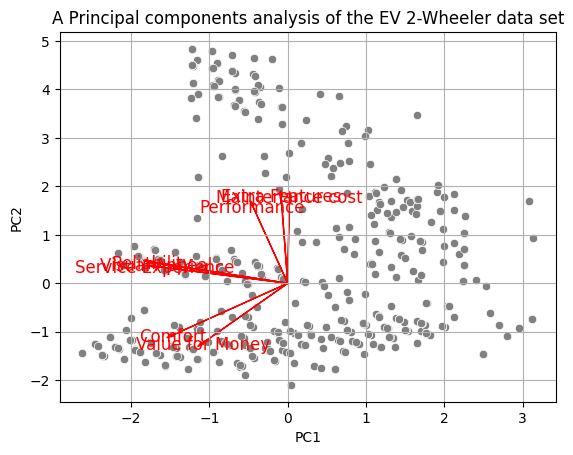

In [48]:
# Calculate centroid
index_names = factor_loadings.index

# Plot data points
sns.scatterplot(df_pca, x = 'PC1', y = 'PC2', color = 'grey')

# Plot arrows from centroid to provided coordinates with index names
for i in range(len(factor_loadings['PC1'])):
    plt.arrow(0, 0, factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i] * 3.5, head_width=0.05, head_length=0.1, fc='red', ec='red')
    plt.text((factor_loadings['PC1'][i] * 3.5), factor_loadings['PC2'][i]* 3.5, index_names[i], fontsize=12, ha='center', color = 'red', va = 'center_baseline')

# Set labels and legend
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('A Principal components analysis of the EV 2-Wheeler data set')
plt.grid(True)
plt.savefig("pca_2w.png", format = 'png')
plt.show()

# Perform clustoring

In [51]:
from sklearn.cluster import KMeans
data_km28 = [KMeans(n_clusters = k, random_state = 42).fit(data_scaled) for k in range(2, 9)]

C:\Users\adity\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\adity\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\adity\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\adity\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

In [52]:
kmeans = data_km28[2]

In [53]:
data_clust = pd.DataFrame(data_scaled, columns = data_segment.columns)
data_clust['cluster'] = kmeans.labels_

In [54]:
data_pca = df_pca.copy()
data_pca['cluster'] = kmeans.labels_

**<h3>Segment Profiling</h3>**

In [55]:
data_profile = data_segment.copy()
data_profile['cluster'] = kmeans.labels_

In [56]:
columns_segment = data_clust.columns
data_pivot = data_profile[columns_segment].groupby('cluster').mean().T

In [57]:
data_pivot_mean = data_pivot.mean(axis = 1).reset_index()
data_pivot_mean.columns = ['Variable', 'Value']

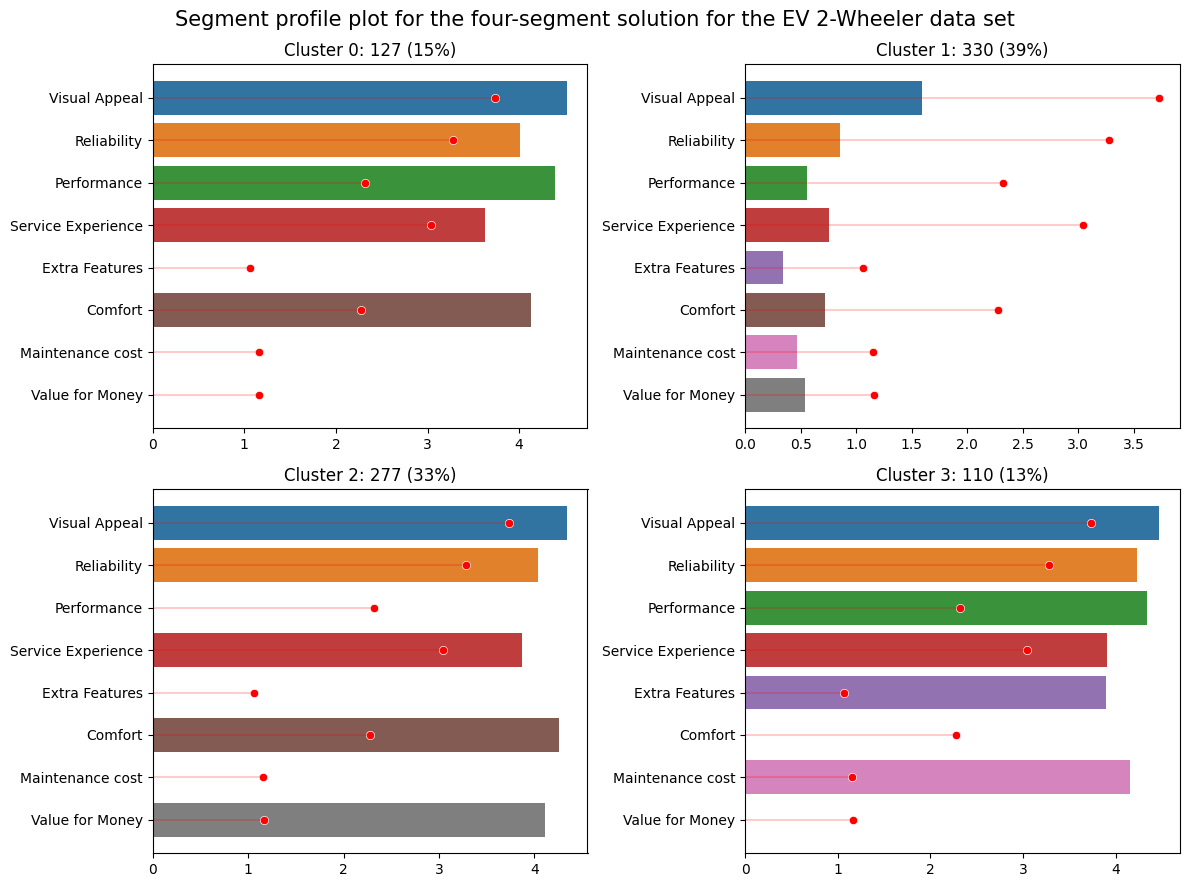

In [58]:
plt.figure(figsize = (12, 9))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.barplot(data_pivot, x = i, y = data_pivot.index)
    sns.scatterplot(data_pivot_mean, x = 'Value', y = 'Variable', color = 'red')
    for index, row in data_pivot_mean.iterrows():
        plt.hlines(y=row['Variable'], xmin=0, xmax=row['Value'], colors='red', alpha = 0.2)
    plt.ylabel("")
    plt.xlabel("")
    plt.title(f"Cluster {i}: {data_profile['cluster'].value_counts()[i]} ({data_profile['cluster'].value_counts()[i]*100/len(data_profile):.0f}%)")
plt.suptitle("Segment profile plot for the four-segment solution for the EV 2-Wheeler data set", fontsize = 15)
plt.tight_layout()
plt.savefig("segment_profile.png")
plt.show()

**The above graph illustrates the various perspectives among the various parts. 15% of customers, or Segment 0, place a high value on the electric two-wheeler vehicle's comfort, performance, dependability, and servicing experience. In contrast, the largest but least happy group is represented by Segment 1 (39% of consumers), who indicate unhappiness with all elements of the business. Consumers in Segment 2 (33%), in particular, prefer comfort, visual appeal, dependability, and excellent value for money. Last but not least, the smallest category, represented by 13% of customers, emphasizes visual appeal, performance, dependability, service experience, extra features, and maintenance costs. This segment exhibits unique perspectives, especially with regard to features and pricing.**

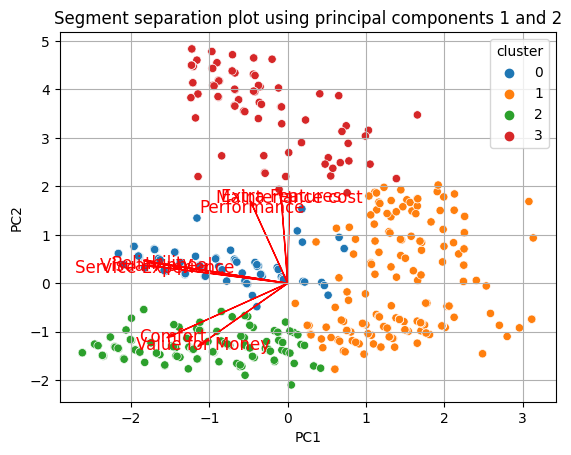

In [59]:
# Calculate centroid
index_names = factor_loadings.index

# Plot data points
sns.scatterplot(data_pca, x = 'PC1', y = 'PC2', hue = 'cluster', palette = 'tab10')

# Plot arrows from centroid to provided coordinates with index names
for i in range(len(factor_loadings['PC1'])):
    plt.arrow(0, 0, factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i] * 3.5, head_width=0.05, head_length=0.1, fc='red', ec='red')
    plt.text(factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i]* 3.5, index_names[i], fontsize=12, ha='center', color = 'red', va = 'center_baseline')

# Set labels and legend
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Segment separation plot using principal components 1 and 2')
plt.grid(True)
plt.savefig("segment_separation.png")
plt.show()

**Using principle components, the above figure highlights the variations between the segments even more. Notably, part 1 is distinct in its dissatisfaction since, although being the largest part, it lacks precise viewpoints.**


## Segment Description

In [60]:
data_desc = data.copy()
data_desc['cluster'] = kmeans.labels_

In [61]:
data_desc.columns

Index(['review', 'Used it for', 'Owned for', 'Ridden for', 'rating',
       'Visual Appeal', 'Reliability', 'Performance', 'Service Experience',
       'Extra Features', 'Comfort', 'Maintenance cost', 'Value for Money',
       'Model Name', 'Price', 'Riding Range (km)', 'Top Speed (kmph)',
       'Weight (kg)', 'Battery Charging Time (hrs)', 'Rated Power (W)',
       'sentiment', 'cluster'],
      dtype='object')

In [62]:
def mosaicplot(df, color_list, figsize=(5,5), barwidth = 1, title = "Simple Mosaic Plot", xlabel = 'cat'):
    
    fig, ax = plt.subplots(figsize =figsize)
    
    # Convert to ratio of each row sum and do a cumsum along row
    p_cnt_ratio_df = df.div(df.sum(1), axis =0)
    ratio_cum_df = p_cnt_ratio_df.cumsum(axis=1)
    
    # Get column order.
    col_order = ratio_cum_df.columns.tolist()
        
    x = [str(n) for n in ratio_cum_df.index.tolist()]
    
    # Do the actual plots
    for col, colour in zip(col_order[::-1], color_list):
        plt.bar(x, ratio_cum_df[col], color=colour, edgecolor='white', width=barwidth, label=col)
        
    # Add in legend
    plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
    

    # Configure title and axis
    plt.title(title)
    plt.xlabel("Segments")
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    plt.yticks([])
    plt.show()


In [63]:
color_list = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B', '#E377C2', '#7F7F7F']

In [64]:
sentiment_cluster = pd.crosstab(index = data_desc['cluster'], columns = data_desc['sentiment'])

In [65]:
sentiment_cluster

sentiment,negative,neutral,positive
cluster,,,
0,13,4,110
1,204,8,118
2,30,41,206
3,17,0,93


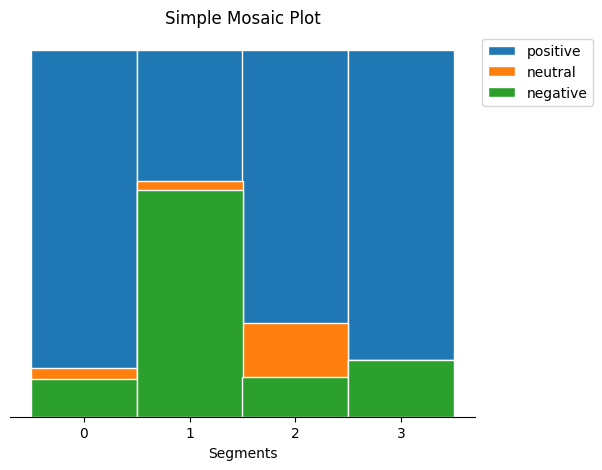

In [66]:
mosaicplot(sentiment_cluster, color_list[:3], figsize=(6,5), barwidth = 1)

**The mosaic plot above investigates customer attitudes and shows that, with the exception of Segment 1, all segments show favorable feelings. Customers in Segment 1 stand out for having bad attitudes and expressing discontent with a variety of factors.**

In [67]:
used_cluster = pd.crosstab(index = data_desc['cluster'], columns = data_desc['Used it for'])

In [68]:
used_cluster

Used it for,Daily Commute,Everything,Leisure Rides,Occasional Commute,Tours
cluster,,,,,
0,75,39,4,9,0
1,244,47,7,27,5
2,194,55,7,19,2
3,87,19,2,1,1


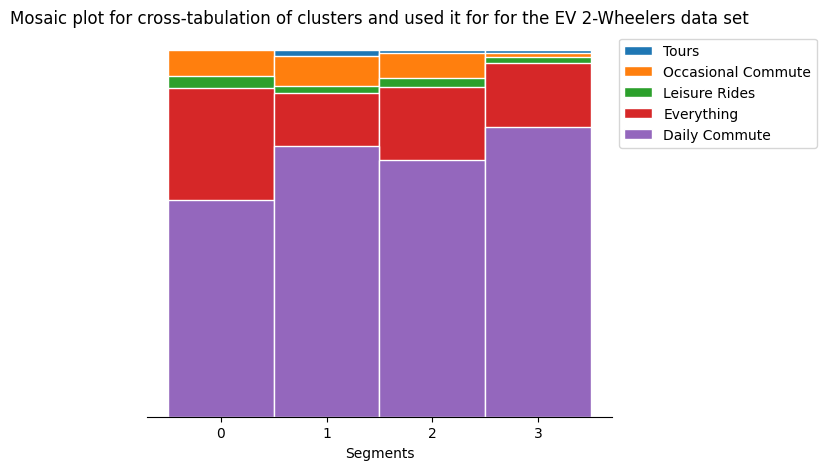

In [69]:
mosaicplot(used_cluster, color_list[:5], figsize=(6,5), barwidth = 1, title = 'Mosaic plot for cross-tabulation of clusters and used it for for the EV 2-Wheelers data set' )

**The mosaic plot above shows that all sectors mostly utilize electric cars for everyday commuting, with only occasional use for tours, leisure trips, and occasional commuting.**

In [70]:
owned_cluster = pd.crosstab(index = data_desc['cluster'], columns = data_desc['Owned for'])

In [71]:
owned_cluster

Owned for,3-6 months,6 months-1 yr,< 3 months,> 1 yr,Never owned,Occasional Commute
cluster,,,,,,
0,16,14,31,10,56,0
1,40,55,67,117,50,1
2,41,51,79,56,50,0
3,14,14,43,20,19,0


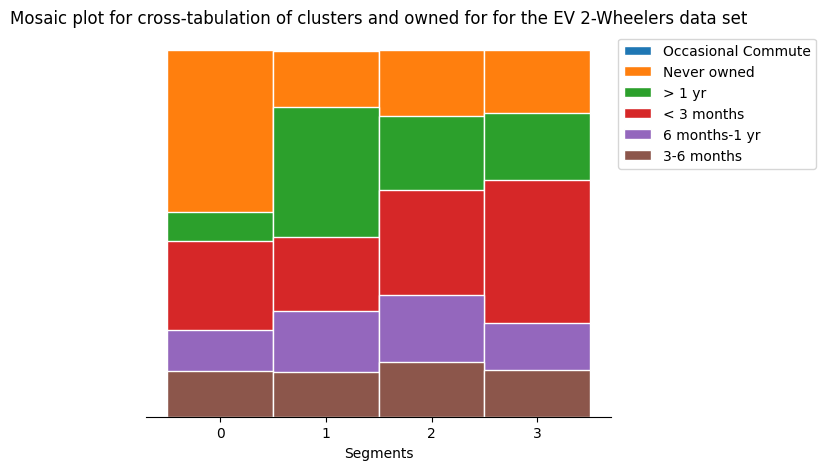

In [72]:
mosaicplot(owned_cluster, color_list[:6], figsize=(6,5), barwidth = 1, title = 'Mosaic plot for cross-tabulation of clusters and owned for for the EV 2-Wheelers data set' )

**The mosaic graphic above shows how long each segment has owned an electric car. Since Segment 0 has never had an electric car, Segment 1 stands out as having owned one for more than a year. Customers in Segment 3 have possessed electric vehicles for a few days to less than three months, while members of Segment 2 own vehicles in a moderate range, from less than three months to more than a year.**

In [73]:
ridden_cluster = pd.crosstab(index = data_desc['cluster'], columns = data_desc['Ridden for'])

In [74]:
ridden_cluster

Ridden for,10000-15000 kms,5000-10000 kms,< 5000 kms,> 15000 kms,Never owned
cluster,,,,,
0,1,15,54,1,0
1,15,61,184,18,1
2,11,44,158,14,0
3,5,18,63,5,0


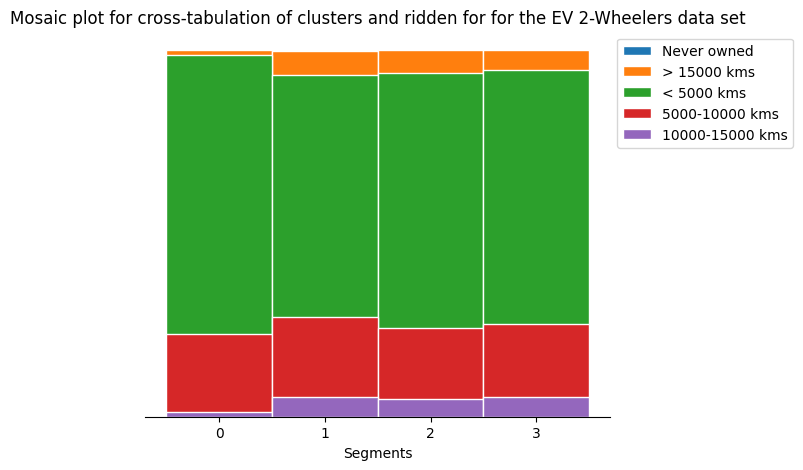

In [75]:
mosaicplot(ridden_cluster, color_list[:5], figsize=(6,5), barwidth = 1, title = 'Mosaic plot for cross-tabulation of clusters and ridden for for the EV 2-Wheelers data set' )

**The mosaic map above explores the distances traveled by consumers and shows that all categories mostly commute by electric car, with the majority of users traveling less than 5000 km. A little percentage is between 5000 and 10,000 kilometers, which corresponds to their commuting requirements.**


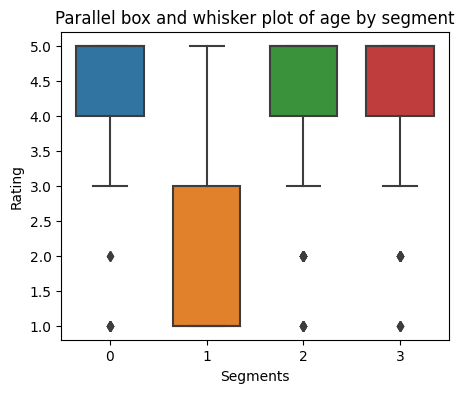

In [76]:
# Number of cluster along the x-axis and rating along the y-axis
plt.figure(figsize = (5,4))
sns.boxplot(data_desc, x= 'cluster', y = 'rating', palette = 'tab10', width = 0.7)
plt.xlabel("Segments")
plt.ylabel("Rating")
plt.title("Parallel box and whisker plot of age by segment")
plt.savefig("rating.png")
plt.show()

**The whisker plot and parallel box above highlight the notable variations in average ratings between the segments. In particular, customers in Segment 1 indicate unhappiness with all perceptions, which results in lower ratings overall.**


In [77]:
data_desc.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,...,Value for Money,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W),sentiment,cluster
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,...,1.0,TVS iQube,137890,100,78,117,5,3000,negative,1
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,...,3.0,TVS iQube,137890,100,78,117,5,3000,negative,1
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,...,2.0,TVS iQube,137890,100,78,117,5,3000,positive,2
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,...,1.0,TVS iQube,137890,100,78,117,5,3000,negative,1
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,...,2.0,TVS iQube,137890,100,78,117,5,3000,negative,2


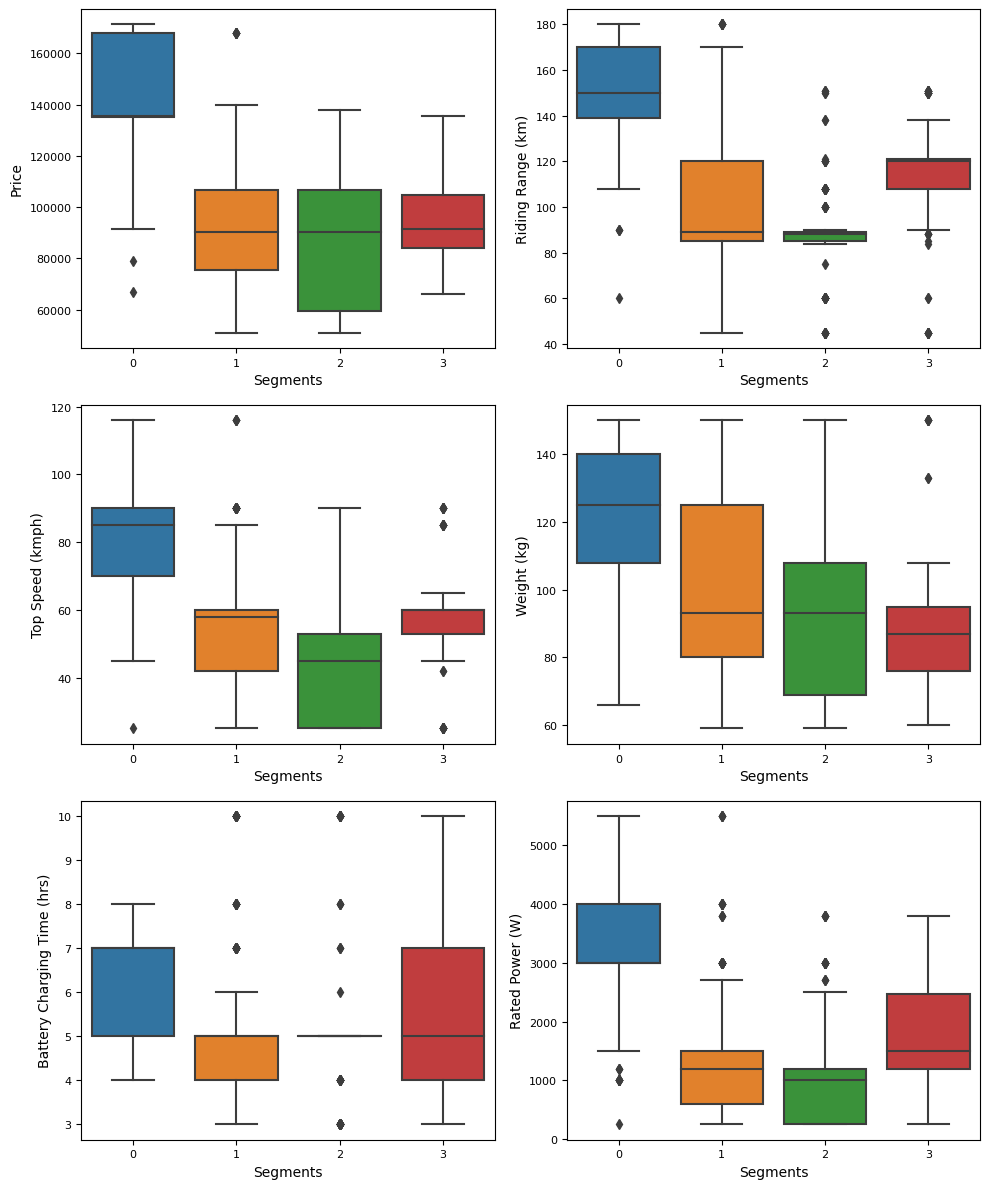

In [78]:
plt.figure(figsize = (10, 12))
for i, col in enumerate(data_desc.columns[-8:-2]):
    plt.subplot(3, 2, i+1)
    sns.boxplot(data_desc, x = 'cluster', y =col)
    plt.xlabel("Segments", fontsize= 10)
    plt.ylabel(col, fontsize = 10)
    plt.xticks(fontsize = 8)
    plt.yticks(fontsize = 8)
plt.tight_layout()
plt.show()

**Different trends appear when examining the technical specifications of electric vehicles across various sectors. Segment 0 emphasizes customer demand for luxury and long-distance travel by favoring premium EVs with a greater price range and longer riding range. Part 1 concentrates on reasonably priced, moderately priced solutions that are appropriate for everyday commuting. Affordability is the top priority for Segments 2 and 3, with marginally different riding range and speed preferences. There are differences in the weight preferences of Segments 0 and 1, with Segment 0 selecting larger cars and Segment 1 favoring lighter choices. Segments 0 and 3 choose lengthier overnight charging periods, but Segments 1 and 2 emphasize quicker charging in order to meet deadlines. There are also differences in charging timings. These subtle tastes influence the electric vehical market in india**

<h2>Target segments</h2>

The market for electric vehicles has two strategic target segments: Segment 1 (39% of customers) and Segment 2 (33% of consumers). By focusing on their unique needs, Segment 1's varied preferences and discontent points offer a chance to increase consumer happiness and loyalty. Segment 2 prioritizes comfort, visual appeal, dependability, and service experience. It also emphasizes value for money by allowing customers to personalize their electric vehicles to fit their needs. In order to maintain competitive advantage and ongoing market expansion, the approach entails addressing discontent points in Segment 1 and increasing positive components in Segment 2. Electric cars are then aligned with the different expectations of each segment.


# Potential Early Market Clientele

**Two main segments—Segment 1 with 330 members (39% of consumers) and Segment 2 with 277 members (33% of consumers)—are found in the examination of the early market customer base. For Segment 1, the goal price range is ₹51,094 to ₹1,67,844, and for Segment 2, it is ₹51,094 to ₹1,37,890. possible earnings may be computed by multiplying the number of possible clients in each sector by the planned price range. For instance, Segment 1's potential profit at a goal price of ₹1,20,000 is ₹39.60 crores, while Segment 2's potential profit at a target price of ₹1,10,000 is ₹30.47 crores. Since Segment 1 has a bigger potential market share, early market penetration efforts are mostly focused on it because of  its significant profit opportunity.**

# Most Optimal Market Segments

Segment 1, which accounts for 39% of the market, has been determined to be the best market segment for electric two-wheelers. Given its sizeable customer base and well-balanced combination of technical specifications and price range, this segment presents a substantial market opportunity. The suggested technical specifications for Segment 1 are as follows: a price range of ₹70,688 to ₹1,29,063, a riding range of 89 to 180 km, a top speed of 58 to 116 kmph, a weight of 76 to 120 kg, a battery charging time of 3 to 5 hours, and rated power of 1200 to 5500 W. This focused approach guarantees compliance with the market's diverse needs and preferences, providing the groundwork for a successful and long-lasting entry into the electric vehicle industry.